## Binary Random Forest / KNN

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df_train = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_train


,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,NORMAL,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,NORMAL,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0.087888,NORMAL,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0.054902,NORMAL,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0.054902,NORMAL,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,SLOW,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,-0.477162,SLOW,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,0.054291,SLOW,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,-0.004963,SLOW,-0.126579,-0.680043,-0.174712,0.033630


In [146]:
df_train.isna().sum()

AccX        0
AccY        0
GyroZ       0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

### Change categories to numbers

In [147]:
df_train = df_train.replace(
    {"Class": {"SLOW": 0, "NORMAL": 1, "AGGRESSIVE": 2}})
df_test = df_test.replace(
    {"Class": {"SLOW": 0, "NORMAL": 1, "AGGRESSIVE": 2}})
df_train


,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,1,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,1,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0.087888,1,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0.054902,1,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0.054902,1,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,0,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,-0.477162,0,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,0.054291,0,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,-0.004963,0,-0.126579,-0.680043,-0.174712,0.033630


### Remove unnecessary columns

In [148]:
# df_train.drop(['AccZ', 'GyroX', 'GyroY', 'Timestamp'], axis=1, inplace=True)
# df_test.drop(['AccZ', 'GyroX', 'GyroY', 'Timestamp'], axis=1, inplace=True)

# df_train

### Only select normal and aggressive values

In [149]:
df_train = df_train.loc[df_train['Class'] != 0]
df_test = df_test.loc[df_test['Class'] != 0]

df_train

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,1,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,1,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0.087888,1,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0.054902,1,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0.054902,1,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...,...
2308,0.538870,-1.645984,0.662712,2,0.200934,-0.962974,0.269435,-0.822992
2309,1.678918,-1.392127,-0.168675,2,1.140048,0.253856,0.839459,-0.696064
2310,0.323433,0.589311,0.639500,2,-1.355486,1.981439,0.161716,0.294656
2311,2.497311,-0.606175,-0.240757,2,2.173878,-1.195487,1.248655,-0.303088


In [150]:
X_train = df_train.drop(columns=["Class"])
y_train = df_train['Class']

X_test = df_test.drop(columns=["Class"])
y_test = df_test['Class']

### Normalize data

In [151]:
X_train = (X_train - X_train.mean()) / X_train.std() * 100
X_test = (X_test - X_test.mean()) / X_test.std() * 100

X_train

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY
0,-3.509345,9.776257,74.896498,-0.018756,0.003491,-3.509345,9.776257
1,-157.992905,-99.985349,102.351035,-146.171580,-96.829548,-157.992905,-99.985349
2,-60.046498,-2.635757,63.415515,92.645759,85.886499,-60.046498,-2.635757
3,66.701299,-13.388488,36.460154,119.893994,-9.482701,66.701299,-13.388488
4,6.163664,88.619412,36.460154,-57.291816,89.996116,6.163664,88.619412
...,...,...,...,...,...,...,...
2308,47.723614,-157.121833,533.137616,18.054827,-86.138250,47.723614,-157.121833
2309,156.113434,-131.381523,-146.237282,102.525996,22.711910,156.113434,-131.381523
2310,27.240939,69.530762,514.169013,-121.941626,177.250781,27.240939,69.530762
2311,233.921883,-51.688213,-205.139734,195.516638,-106.937380,233.921883,-51.688213


## Train model

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [153]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=15, random_state=5, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=30,
                       random_state=5)

In [154]:
rfc.score(X_train, y_train)

0.8832684824902723

In [155]:
rfc.score(X_test, y_test)

0.6112644947542794

In [156]:
classes=['NORMAL', 'AGGRESSIVE']

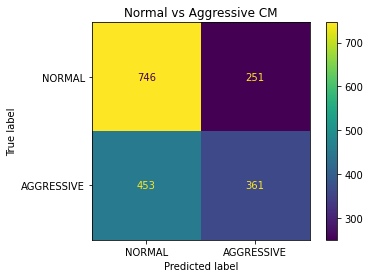

In [157]:
y_pred = rfc.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Normal vs Aggressive CM')
plt.show()


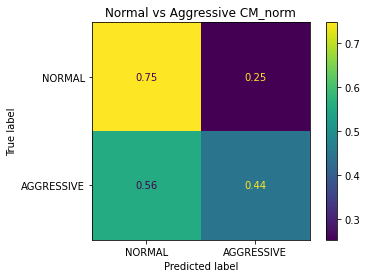

In [158]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Normal vs Aggressive CM_norm')
plt.show()

In [159]:
rfc.score(X_test, y_test)

0.6112644947542794

In [160]:
rfc_imp = pd.DataFrame(rfc.feature_importances_, columns=['importance'])

In [161]:
rfc_imp['importance'] = rfc_imp['importance'] * 100
rfc_imp = rfc_imp.set_index(X_train.columns)
rfc_imp


,importance
AccX,14.332129
AccY,13.421542
GyroZ,13.370358
DiffAccX,13.929883
DiffAccY,15.421162
VelX,14.128181
VelY,15.396745


In [162]:
rfc_imp.sort_values(by='importance', ascending=False)

,importance
DiffAccY,15.421162
VelY,15.396745
AccX,14.332129
VelX,14.128181
DiffAccX,13.929883
AccY,13.421542
GyroZ,13.370358


### Train model with RandomSearchCV

In [163]:
n_estimators = np.arange(2, 200, 2)

max_features = ['sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 20, num = 20)]
max_depth.append(None)

min_samples_split = np.arange(2, 10)

min_samples_leaf = np.arange(1, 4)

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [164]:
weights = {1:1, 2:1}
random_forest = RandomForestClassifier(random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)

param_grid = {'n_estimators': np.arange(2, 30, 2), 'max_depth': np.arange(3, 30), 'max_leaf_nodes': np.arange(6, 30, 2), 'min_samples_leaf': np.arange(1, 4)}

# best_params: test 47.5% {'max_depth': 7, 'n_estimators': 33}

# AccY, AccX, GyroZ, GyroX
# best params 2 : test 47% {'n_estimators': 96, 'min_samples_split': 3 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5,'bootstrap': False}

random_gscv = RandomizedSearchCV(random_forest, random_grid, n_iter=100, cv=5, verbose=10, n_jobs=10, random_state=0)
random_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={1: 1, 2: 1},
                                                    criterion='entropy',
                                                    min_impurity_decrease=0,
                                                    random_state=0),
                   n_iter=100, n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 5, 6, 7, 8, 8, 9, 10,
                                                      11, 12, 12, 13, 14, 15,
                                                      16, 16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': array([1, 2, 3]),
                                        'min_sam...
                                        'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198])},
                   random_state=0, verbose=10)

In [165]:
random_gscv.best_params_

{'n_estimators': 78,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}

In [166]:
random_gscv.best_score_

0.6242985236505755

In [167]:
random_gscv.score(X_train, y_train)

0.7907479463899697

In [168]:
random_gscv.score(X_test, y_test)

0.6333517393705135

In [169]:
classes = ["NORMAL", "AGGRESIVE"]

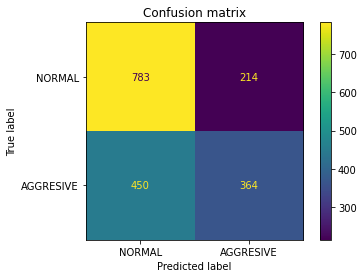

In [170]:
y_pred = random_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

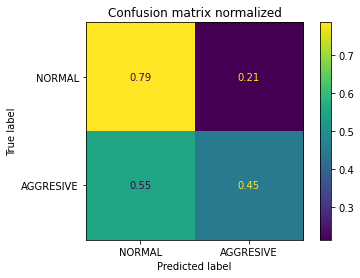

In [171]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

#### Evaluate improvment

In [172]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = random_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (random_accuracy - base_accuracy) / base_accuracy:.3f}%.')

Model Performance
Accuracy = 0.609%.
Model Performance
Accuracy = 0.633%.
Improvement of 3.989%.


### KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [174]:
Kneigh = KNeighborsClassifier(weights="uniform")

param_grid = {'n_neighbors': np.arange(1, 20), 'leaf_size': np.arange(20, 40)}

knn_gscv = GridSearchCV(Kneigh, param_grid, cv=5, verbose=10, n_jobs=10)
knn_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=10)

In [175]:
best_params = knn_gscv.best_params_
best_params

{'leaf_size': 20, 'n_neighbors': 18}

In [176]:
knn_gscv.best_score_

0.5992295681280563

In [177]:
knn_gscv.score(X_train, y_train)

0.6519671422395158

In [178]:
knn_gscv.score(X_test, y_test)

0.6245168415240199

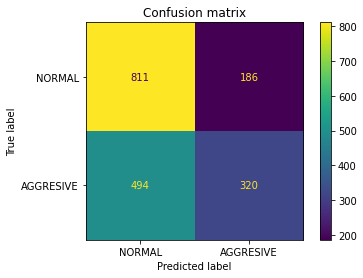

In [179]:
y_pred = knn_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

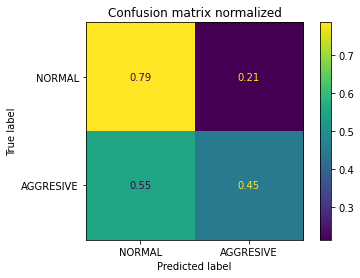

In [180]:
ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

In [181]:
from sklearn.ensemble import BaggingClassifier

knn_bagging = BaggingClassifier(knn_gscv.best_estimator_, max_samples=0.8, max_features=0.7, random_state=0)
knn_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=20,
                                                      n_neighbors=18),
                  max_features=0.7, max_samples=0.8, random_state=0)

In [182]:
knn_bagging.score(X_train, y_train)

0.6796368352788587

In [183]:
knn_bagging.score(X_test, y_test)

0.6151297625621204

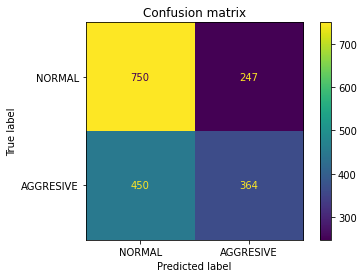

In [184]:
y_pred = knn_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

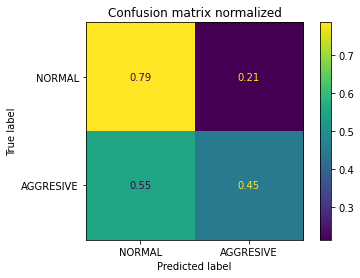

In [185]:
ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

In [186]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(knn_bagging, X_test, y_test)

best_random = knn_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.615%.
Model Performance
Accuracy = 0.625%.
Improvement of -1.503%.
